## Loss Function


Assume an image classifier model with three outputs for classes: panda, cat, dog. given an image the model makes a prediction as a probability for each class.

<img src="images/panda_model.png" height="150">

The model is wrongly predicting that the image depicts a cat with a probability of 0.75. In order to correct the model first we must compute by how much the model is wrong.

In this case we have an output $\begin{bmatrix}0.15\\0.75\\0.1\end{bmatrix}$ and the target is $\begin{bmatrix}1\\0\\0\end{bmatrix}$

The loss function quantifies how bad a model is performing, the larger the value the worse the model.

 The loss function is a function with two arguments: the ground truth, or target, and the model's output. It is a measure of the discrepancy between the model's output and the groud truth.

loss $ \Bigl( \begin{bmatrix}1\\0\\0\end{bmatrix} , \begin{bmatrix}0.15\\0.75\\0.1\end{bmatrix}  \Bigl) = \dots$



### Mean Squared Error

The simplest loss function, it computes the sum of the squared difference between the output and the ground truth.

$ e = 1/N \times \large\sum_{i=1}^N (gt_i-pred_i)^2$



In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# this function assumes a single output and therefore does not perform 
# the division by the number of elements


def squared_error(gt, predicted):

    mean_square_error = (gt - predicted)**2.0
    return mean_square_error

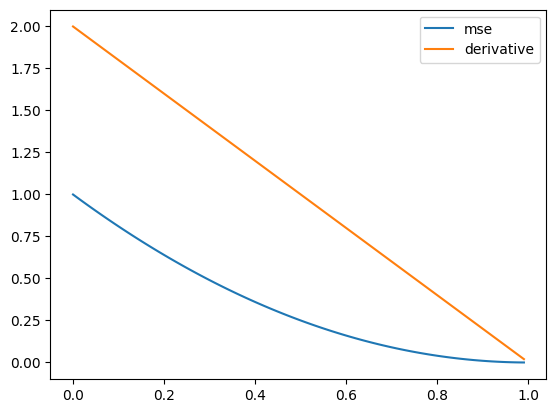

In [23]:
xx = [k/100 for k in range(100)]

y = [squared_error(1, k) for k in xx]
dy = [2*(1-x) for x in xx]


plt.plot(xx,y, label = 'mse')
plt.plot(xx,dy, label = 'derivative')
plt.legend()
plt.show()

#### torch usage

In [4]:
import torch

loss_fn = torch.nn.MSELoss()
input = torch.randn(2, 4)
target = torch.tensor([[1,0,0,0], [0,1,0,0]])
loss = loss_fn(input, target)
print(input)
print(target)
print(loss)


tensor([[-1.3923,  0.2241, -0.0739, -0.5590],
        [-0.9968, -0.2792, -0.8247,  0.4566]])
tensor([[1, 0, 0, 0],
        [0, 1, 0, 0]])
tensor(1.2013)


### Cross Entropy Loss

$ e =  - \large \sum_i gt_i \times log(pred_i)$

In [5]:
def categorical_cross_entropy(gt, predicted):

    return  - gt * math.log(1e-8 + predicted)

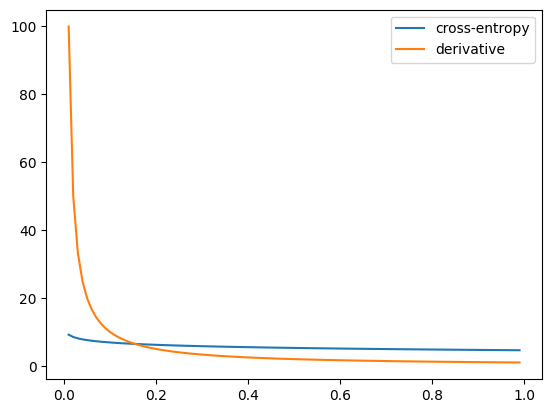

In [22]:
z = [categorical_cross_entropy(1, k/100) for k in xx[1:]]
dz = [1/k for k in xx[1:]]

plt.plot(xx[1:],z, label = 'cross-entropy')
plt.plot(xx[1:],dz, label = 'derivative')
plt.legend()
plt.show()

Compared with MSE, Cross Entropy has higher gradients pushing for large steps when the predicted value is further away ground truth.